# Runge–Kutta 4 (RK4) Method

The classical 4th-order Runge–Kutta method (RK4) is one of the most widely used numerical methods for solving ordinary differential equations (ODEs).

We want to solve an initial value problem:

$$
\frac{dy}{dt} = f(t, y), \quad y(t_0) = y_0
$$

The RK4 algorithm for a time step $\Delta t$ is:

$$
\begin{aligned}
k_1 &= f(t_n, y_n) \\
k_2 &= f\!\left(t_n + \tfrac{\Delta t}{2}, y_n + \tfrac{\Delta t}{2} k_1 \right) \\
k_3 &= f\!\left(t_n + \tfrac{\Delta t}{2}, y_n + \tfrac{\Delta t}{2} k_2 \right) \\
k_4 &= f\!\left(t_n + \Delta t, y_n + \Delta t k_3 \right)
\end{aligned}
$$

Update formula:

$$
y_{n+1} = y_n + \frac{\Delta t}{6}(k_1 + 2k_2 + 2k_3 + k_4)
$$



## Example: Exponential Decay
We solve:

$$
\frac{dy}{dt} = -\lambda y, \quad y(0) = 1
$$

with the exact solution:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters
lam = 1.0        # decay constant
y0 = 1.0         # initial condition
dt = 0.1         # time step
T = 5.0          # final time
N = int(T/dt)    # number of steps

# Arrays
t = np.linspace(0, T, N+1)
y = np.zeros(N+1)
y[0] = y0

# RK4 method
for n in range(N):
    k1 = -lam * y[n]
    k2 = -lam * (y[n] + 0.5*dt*k1)
    k3 = -lam * (y[n] + 0.5*dt*k2)
    k4 = -lam * (y[n] + dt*k3)
    y[n+1] = y[n] + (dt/6.0)*(k1 + 2*k2 + 2*k3 + k4)

# Exact solution
y_exact = np.exp(-lam * t)

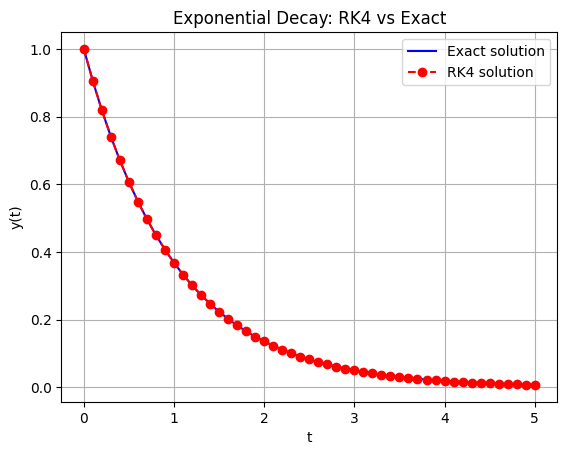

In [3]:
# Plot
plt.plot(t, y_exact, 'b-', label="Exact solution")
plt.plot(t, y, 'ro--', label="RK4 solution")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Exponential Decay: RK4 vs Exact")
plt.legend()
plt.grid(True)
plt.show()

## Conclusion

- The RK4 method provides excellent agreement with the exact solution for the exponential decay problem.  
- Even with a relatively large time step ($\Delta t = 0.1$), the RK4 solution closely follows the exact curve.  
- The global error of RK4 is of order $\mathcal{O}(\Delta t^4)$, making it much more accurate than Euler's method or Heun's method for the same step size.